In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf_data = pd.read_csv('output/tf_eval_df.csv')
st_data = pd.read_csv('output/st_eval_df.csv')

In [3]:
tf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   category                         352 non-null    object
 1   intent_id                        352 non-null    int64 
 2   task                             352 non-null    object
 3   tf_matched_intent_id             352 non-null    int64 
 4   tf_matched_intent_text           352 non-null    object
 5   tf_is_intent_matched             352 non-null    bool  
 6   tf_matched_intent_id_shuffled    352 non-null    int64 
 7   tf_matched_intent_text_shuffled  352 non-null    object
 8   tf_is_intent_matched_shuffled    352 non-null    bool  
dtypes: bool(2), int64(3), object(4)
memory usage: 20.1+ KB


In [4]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   category                         352 non-null    object
 1   intent_id                        352 non-null    int64 
 2   task                             352 non-null    object
 3   st_matched_intent_id             352 non-null    int64 
 4   st_matched_intent_text           352 non-null    object
 5   st_is_intent_matched             352 non-null    bool  
 6   st_matched_intent_id_shuffled    352 non-null    int64 
 7   st_matched_intent_text_shuffled  352 non-null    object
 8   st_is_intent_matched_shuffled    352 non-null    bool  
dtypes: bool(2), int64(3), object(4)
memory usage: 20.1+ KB


In [5]:
tf_data['tf_is_intent_matched'].value_counts()

True    352
Name: tf_is_intent_matched, dtype: int64

In [6]:
st_data['st_is_intent_matched'].value_counts()

True    352
Name: st_is_intent_matched, dtype: int64

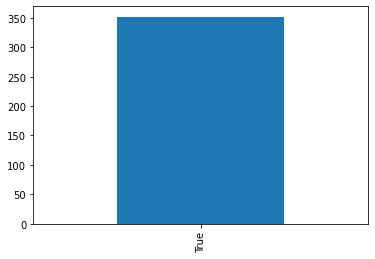

In [7]:
tf_data['tf_is_intent_matched'].value_counts().plot.bar()
plt.show()

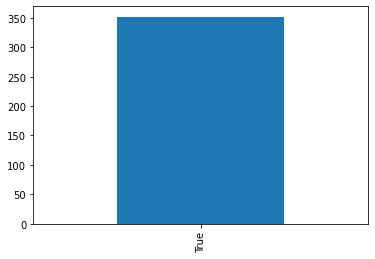

In [8]:
st_data['st_is_intent_matched'].value_counts().plot.bar()
plt.show()

In [9]:
tf_data['tf_is_intent_matched_shuffled'].value_counts()

True     351
False      1
Name: tf_is_intent_matched_shuffled, dtype: int64

In [10]:
tf_data[tf_data['tf_is_intent_matched_shuffled'] == False]

,category,intent_id,task,tf_matched_intent_id,tf_matched_intent_text,tf_is_intent_matched,tf_matched_intent_id_shuffled,tf_matched_intent_text_shuffled,tf_is_intent_matched_shuffled
169,Airtable,169,Airtable - Get data,169,Airtable - Get data,True,50,Newsapi - Get data,False


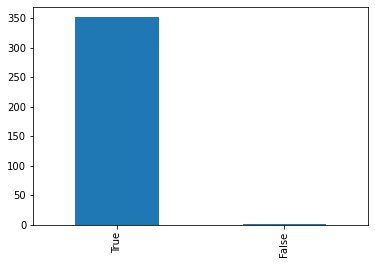

In [11]:
tf_data['tf_is_intent_matched_shuffled'].value_counts().plot.bar()
plt.show()

In [12]:
st_data['st_is_intent_matched_shuffled'].value_counts()

True     350
False      2
Name: st_is_intent_matched_shuffled, dtype: int64

In [13]:
st_data[st_data['st_is_intent_matched_shuffled'] == False]

,category,intent_id,task,st_matched_intent_id,st_matched_intent_text,st_is_intent_matched,st_matched_intent_id_shuffled,st_matched_intent_text_shuffled,st_is_intent_matched_shuffled
34,Google Sheets,34,Google Sheets - Send data to MongoDB,34,Google Sheets - Send data to MongoDB,True,126,MongoDB - Send data to Google Sheets,False
126,MongoDB,126,MongoDB - Send data to Google Sheets,126,MongoDB - Send data to Google Sheets,True,34,Google Sheets - Send data to MongoDB,False


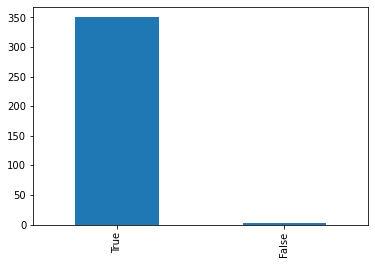

In [14]:
st_data['st_is_intent_matched_shuffled'].value_counts().plot.bar()
plt.show()

In [27]:
speed_benchmark = pd.read_csv('output/speed_benchmark.csv')
speed_benchmark

,repetitions,tf_time_elapsed,st_time_elapsed
0,0,0.000003,0.000002
1,1,1.755822,8.272556
2,2,3.255506,17.061706
3,3,4.404537,26.071062
4,4,6.189593,35.721578
5,5,7.772967,44.145934
6,6,9.517264,56.337967
7,7,10.562992,72.224635
8,8,12.480063,78.887859
9,9,13.984340,87.984332


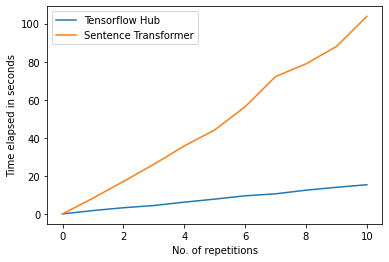

In [28]:
plt.plot(speed_benchmark['repetitions'], speed_benchmark['tf_time_elapsed'], label='Tensorflow Hub')
plt.plot(speed_benchmark['repetitions'], speed_benchmark['st_time_elapsed'], label='Sentence Transformer')

plt.xlabel('No. of repetitions')
plt.ylabel('Time elapsed in seconds')
plt.legend(loc="upper left")

plt.show()

In [10]:
import spacy
nlp = spacy.load("training/model-best")
doc = nlp('make scatter plot of time_elapsed and height_from_ground_level from df')
spacy.displacy.render(doc, style="ent", jupyter=True)